<h1 style="color: #D2691E       ;"> Import clean data .py file </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_production = pd.read_csv("producers.csv")
df_production.head()

,categories,country,2020,2021,2022,2023,2024,2025,avg_price_per_cup
0,Arabica Production,Brazil,49700,36400,39800,44900,48200,45400,1.55
1,Arabica Production,Colombia,13400,11800,10700,12760,12400,12900,1.14
2,Arabica Production,Ethiopia,7600,8150,7300,8600,8360,8360,0.78
3,Arabica Production,Honduras,6500,4800,5700,5000,5300,5300,1.80
4,Arabica Production,Peru,3369,4200,3475,4000,4250,4350,2.50


In [3]:
df_production.shape

(165, 9)

In [4]:
df_production.dtypes

categories            object
country               object
2020                   int64
2021                   int64
2022                   int64
2023                   int64
2024                   int64
2025                   int64
avg_price_per_cup    float64
dtype: object

<h1 style="color: #D2691E;"> 03| EDA (Exploratory Data Analysis)- production data</h1>

<h3 style="color: #D2691E;"> Exploring numerical and categorical variable</h3>

In [5]:
categorical= df_production.select_dtypes(exclude="number")
numerical= df_production.select_dtypes(include= "number")

<h3 style="color: #D2691E;"> Univariate analysis </h3>

<h4 style="color: #D2691E;"> Categorical Variables </h4>

I will start by doing univarite analyses for better understanding of each column

In [6]:
categorical.head(2)

,categories,country
0,Arabica Production,Brazil
1,Arabica Production,Colombia


In [7]:
frequency_table_cat= categorical.categories.value_counts()

In [8]:
proportion_table_cat= categorical.categories.value_counts(normalize= True).round(2)

In [9]:
category_table= pd.concat([frequency_table_cat, proportion_table_cat], axis=1)
category_table.columns= ['absolute_frequency','relative_frequency']
category_table.reset_index()

,categories,absolute_frequency,relative_frequency
0,Production,25,0.15
1,Domestic Consumption,25,0.15
2,Arabica Production,15,0.09
3,Robusta Production,10,0.06
4,Bean Export,10,0.06
5,Roast and Ground Exports,10,0.06
6,Soluble Exports,10,0.06
7,Exports,10,0.06
8,Bean Imports,10,0.06
9,Roast and Ground Imports,10,0.06


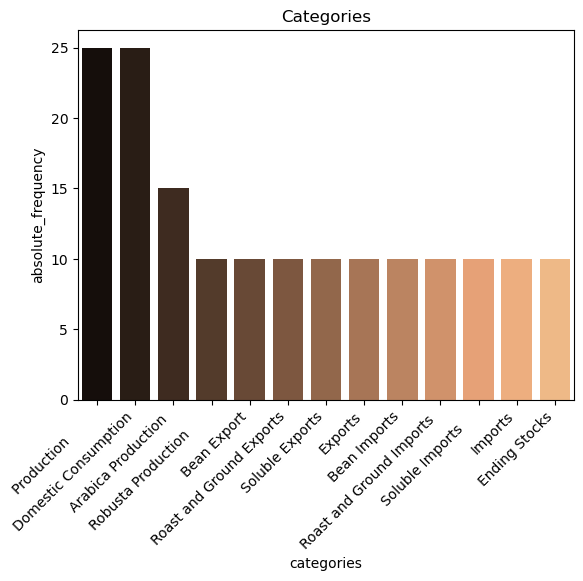

In [10]:
sns.barplot(x="categories", y="absolute_frequency", data= category_table, palette= "copper")
plt.title("Categories")
plt.xticks(rotation=45, ha="right")
plt.show()

In [11]:
top_categories_5= category_table["absolute_frequency"].head(5)

<Axes: ylabel='absolute_frequency'>

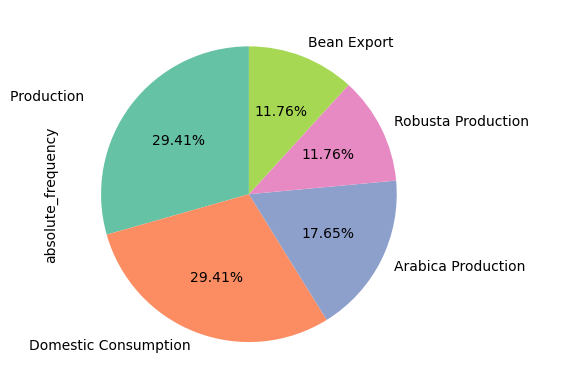

In [12]:
top_categories_5.plot.pie(autopct='%1.2f%%',startangle=90,colors=sns.color_palette('Set2'))

Production and Domestic Consumption both have the highest absolute frequency of 27 each, and they also have the highest relative frequency of 0.14. This indicates that these two categories are the most frequently represented in your dataset, accounting for 14% of the total entries each.

Arabica Production has a slightly lower absolute frequency of 17, which is 0.09 in relative frequency.
Other categories like Robusta Production, Bean Export, Roast and Ground Exports, Soluble Exports, Exports, Bean Imports, Roast and Ground Imports, Soluble Imports, Imports, and Ending Stocks all have the same absolute frequency of 12 and a relative frequency of 0.06

Taking out Total and Other for a better visualization

In [13]:
frequency_table_country = categorical.country.value_counts().reset_index()
frequency_table_country.columns = ['country', 'absolute_frequency']
frequency_table_country= frequency_table_country[frequency_table_country['country'] != "Other"]
frequency_table_country= frequency_table_country[frequency_table_country['country'] != "Total"]

In [14]:
proportion_table_country= categorical.country.value_counts(normalize= True).round(2).reset_index()
proportion_table_country.columns = ['country', 'proportion']
proportion_table_country= proportion_table_country[proportion_table_country['country'] != "Other"]
proportion_table_country= proportion_table_country[proportion_table_country['country'] != "Total"]

In [15]:
country_table= pd.concat([frequency_table_country,proportion_table_country], axis=1)
country_table.columns= ['country','absolute_frequency','country_2','relative_frequency']
country_table.drop(columns="country_2", inplace=True)
country_table

,country,absolute_frequency,relative_frequency
0,Indonesia,10,0.06
1,China,10,0.06
2,Vietnam,10,0.06
3,Brazil,9,0.05
4,Colombia,8,0.05
5,Mexico,7,0.04
6,India,7,0.04
7,European Union,7,0.04
8,Ethiopia,6,0.04
9,United States,6,0.04


In [16]:
top_10_country= country_table.head(10)
top_10_country

,country,absolute_frequency,relative_frequency
0,Indonesia,10,0.06
1,China,10,0.06
2,Vietnam,10,0.06
3,Brazil,9,0.05
4,Colombia,8,0.05
5,Mexico,7,0.04
6,India,7,0.04
7,European Union,7,0.04
8,Ethiopia,6,0.04
9,United States,6,0.04


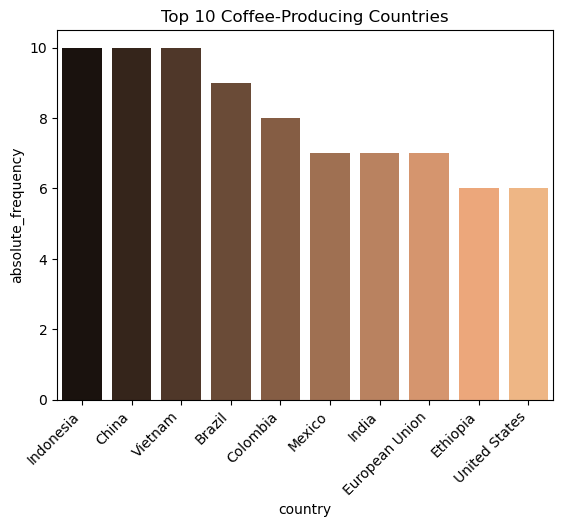

In [17]:
sns.barplot(x="country", y="absolute_frequency", data= top_10_country, palette= "copper")
plt.title("Top 10 Coffee-Producing Countries")
plt.xticks(rotation=45, ha="right")
plt.show()

In [18]:
top_5_country= country_table["absolute_frequency"].head(5)

<Axes: ylabel='absolute_frequency'>

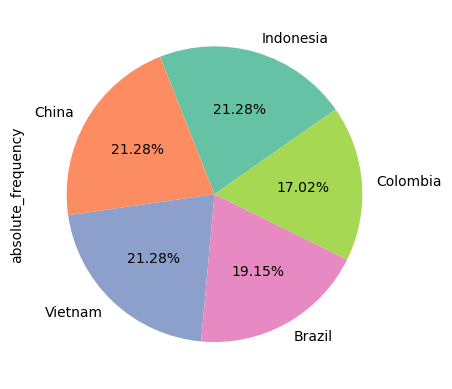

In [19]:
top_5_country.plot.pie(autopct='%1.2f%%', startangle=35, colors=sns.color_palette('Set2'),labels=top_10_country['country'])

China, Indonesia, and Vietnam top the list, each representing 5% of the data, highlighting their significant roles in the coffee industry.
Brazil and Colombia, two of the largest coffee producers, have slightly lower frequencies but still remain prominent in the dataset.
A variety of countries are involved in coffee, with significant representation from Mexico, India, European Union, Ethiopia, and United States.

Smaller countries such as Australia, Cote d'Ivoire, Saudi Arabia, and others have minimal representation, suggesting a smaller, role in the global coffee market.

The dataset also includes countries with emerging or smaller roles in coffee like Kazakhstan, Turkey, and Venezuela.

<h4 style="color: #D2691E;"> Numerical Variables </h4>

In [20]:
numerical.describe()

,2020,2021,2022,2023,2024,2025,avg_price_per_cup
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,6166.636364,5967.521212,5813.981818,5868.678788,6128.836364,6015.315152,2.487758
std,10796.421293,10113.208584,10004.657206,10363.323306,10929.767990,10493.905470,1.129464
min,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,0.420000
25%,700.000000,725.000000,825.000000,880.000000,875.000000,925.000000,1.800000
50%,2635.000000,2725.000000,2500.000000,2426.000000,2450.000000,2500.000000,2.370000
75%,5900.000000,5060.000000,5310.000000,5355.000000,5300.000000,5400.000000,3.100000
max,69900.000000,58100.000000,62600.000000,66300.000000,69900.000000,66400.000000,5.900000


### Conclusions I draw from describe():

The mean production values fluctuate slightly over the years, ranging from 11,161 (2022) to 11,751 (2024).
While the numbers are relatively close, 2024 stands out with the highest average production, suggesting that coffee production might be slightly increasing in recent years.

Regarding the standard deviation, is high indicating a significant level of variability in coffee production values each year.
The highest variability is observed in 2024, and the lowest in 2022. This variability could indicate the presence of extreme outliers in production for certain years.

The minimum values are consistent across years, remaining at 10 for all years, indicating that there are countries or regions with very low production.
The maximum production values are very large, ranging from 167,855 in 2021 to 176,559 in 2020, showing that there are some countries or regions with extremely high coffee production.

Concerning the percentiles, the 25th percentile values hover between 875 and 950, which suggests that at least a quarter of the countries or regions produce relatively low amounts of coffee.
The 50th percentile also seen as median values range from 2,995 to 3,150, which shows that the middle 50% of production values lie within this range.
Lastly the 75th percentile is also relatively stable, ranging from 6,260 to 6,517. This indicates that a significant portion of production is concentrated in the lower-to-middle range.

I can then conclude that the peak year for the highest mean production is 2024 with 11,751, but the values for other years are close to this figure, suggesting consistent production trends.

The coffee production data from 2020 to 2025 shows a generally stable pattern with a slight increase in production in 2024. The variability remains high each year, driven by a few countries or regions with very large production values. The distribution of coffee production shows that most countries or regions produce moderate amounts of coffee, while a few contribute to the extremes.

Lastly I will be analysing the average price per cup being the mean of the entire dataset is 2.49 dolars.
The standard deviation is 1.13 dollars, indicating that while most coffee prices are around the average, there are some significant fluctuations while the lowest price recorded is 0.42 dollars.
The price at the 25th percentile is 1.80 dollars, indicating that 25% of the data has coffee priced below this threshold while the median price is 2.37 dollars, which is close to the mean, showing that the distribution of coffee prices is relatively balanced.
Regarding the price at the 75th percentile is 3.10 dollars, suggesting that 25% of the coffee prices exceed this price and the highest price recorded is 5.90 dollars.

<h4 style="color: #D2691E;"> Shape of distribution - Skewness </h4>

In [21]:
numerical["2020"].skew().round(2)

3.2

In [22]:
numerical["2021"].skew().round(2)

2.93

In [23]:
numerical["2022"].skew().round(2)

3.1

In [24]:
numerical["2023"].skew().round(2)

3.29

In [25]:
numerical["2024"].skew().round(2)

3.27

In [26]:
numerical["2025"].skew().round(2)

3.2

In [27]:
numerical["avg_price_per_cup"].skew().round(2)

0.72

For all years, the skewness values are around 4.0–4.1, meaning the data is highly skewed to the right.
This tells us that most values are grouped at the lower end, but there are some unusually high values also called as outliers pulling the data to the right.

The skewness of 0.72 for pricing suggests that most of the prices per cup are concentrated on the lower end of the price range.
However, there are some higher-priced outliers that are pulling the average price upwards, making the distribution "tail off" towards the higher values

<h4 style="color: #D2691E;"> Shape of distribution - Kurtosis </h4>

In [28]:
numerical["2020"].kurtosis().round(2)

11.4

In [29]:
numerical["2021"].kurtosis().round(2)

8.66

In [30]:
numerical["2022"].kurtosis().round(2)

10.37

In [31]:
numerical["2023"].kurtosis().round(2)

11.72

In [32]:
numerical["2024"].kurtosis().round(2)

11.57

In [33]:
numerical["2025"].kurtosis().round(2)

11.01

In [34]:
numerical["avg_price_per_cup"].kurtosis().round(2)

0.6

The kurtosis values are very high, ranging between 17.5 and 18.4, indicating that the data has sharp peaks and heavy tails.
This means there are many extreme values, which make the distribution look less flat and more concentrated in certain areas.

In conclusion the data shape has not changed much from 2020 to 2025; the skewness and kurtosis values stay relatively stable.
2020 shows slightly lower values compared to the following years, which could suggest minor differences in extreme or unusual values—perhaps influenced by external factors like COVID-19.
Despite these slight differences, the overall pattern of the data remains consistent, dominated by small values with a few larger ones standing out.

The kurtosis of 0.6 for pricing suggests a distribution with some extreme outliers representing lighter tails. So I can afirm that the distribution is flatter than the normal distribution, with less data concentrated in the extreme values.

I decided to get the mean of each year to see the production evolution along the years

In [35]:
year_means= numerical[["2020", "2021", "2022", "2023", "2024", "2025"]].mean()

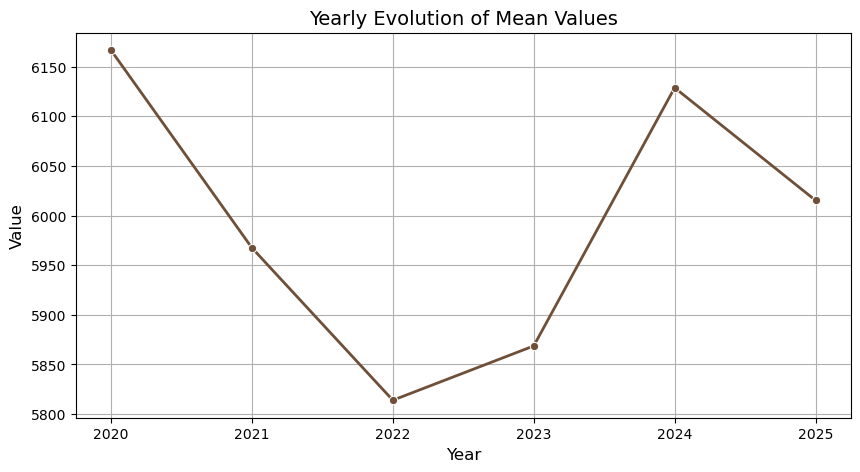

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_means.index, y=year_means.values, marker='o', color='#6F4F37', linewidth=2)

plt.title("Yearly Evolution of Mean Values", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True)

plt.show()

The sharp decline from 2020 to 2022 suggests that coffee production or related metrics faced significant challenges during this period, possibly due to the global impact of the COVID-19 pandemic since lockdowns and travel restrictions disrupted the availability of farm labor in major coffee-producing regions like Brazil, Colombia, and Ethiopia, where harvesting heavily relies on manual work.

The logistics of exporting coffee were also affected, with delays in shipping, increased storage costs, and reduced market accessibility for small-scale producers. Cafes and restaurants were closed during lockdowns, leading to a decline in out-of-home coffee consumption. As well financial challenges faced by coffee producers, coupled with increased production costs, may have hindered production capacity.

From 2022 onward, the chart shows a strong recovery, peaking in 2024. This phase likely reflects a return to stability and growth in the coffee industry. Latly its possible to see a decline in 2025 possibly due to lack of data since there is  only data from the beggining of this year.

In [37]:
country_avg_price = df_production.groupby('country')['avg_price_per_cup'].mean().sort_values(ascending=False).head(10)

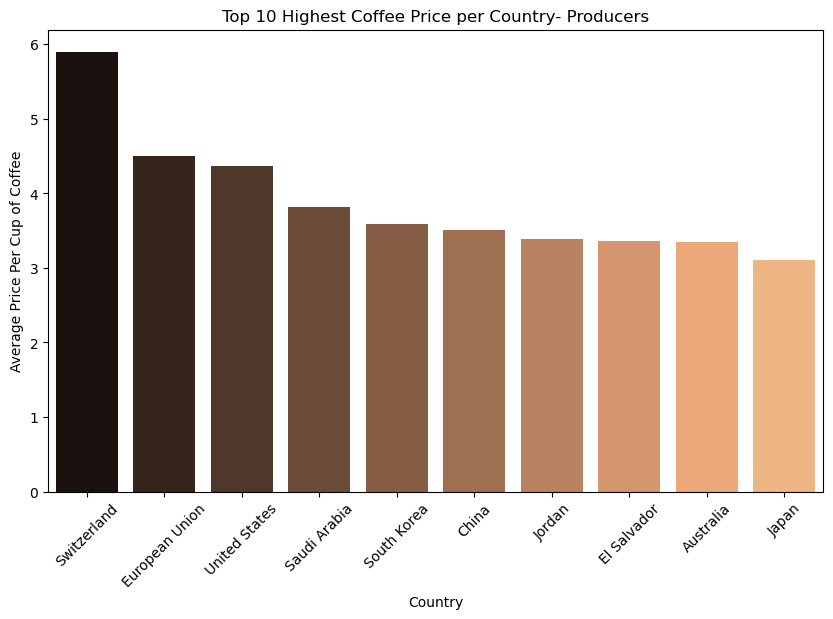

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_avg_price.index, y=country_avg_price.values,palette='copper')

plt.title('Top 10 Highest Coffee Price per Country- Producers')
plt.xlabel('Country')
plt.ylabel('Average Price Per Cup of Coffee')
plt.xticks(rotation=45)

plt.show()

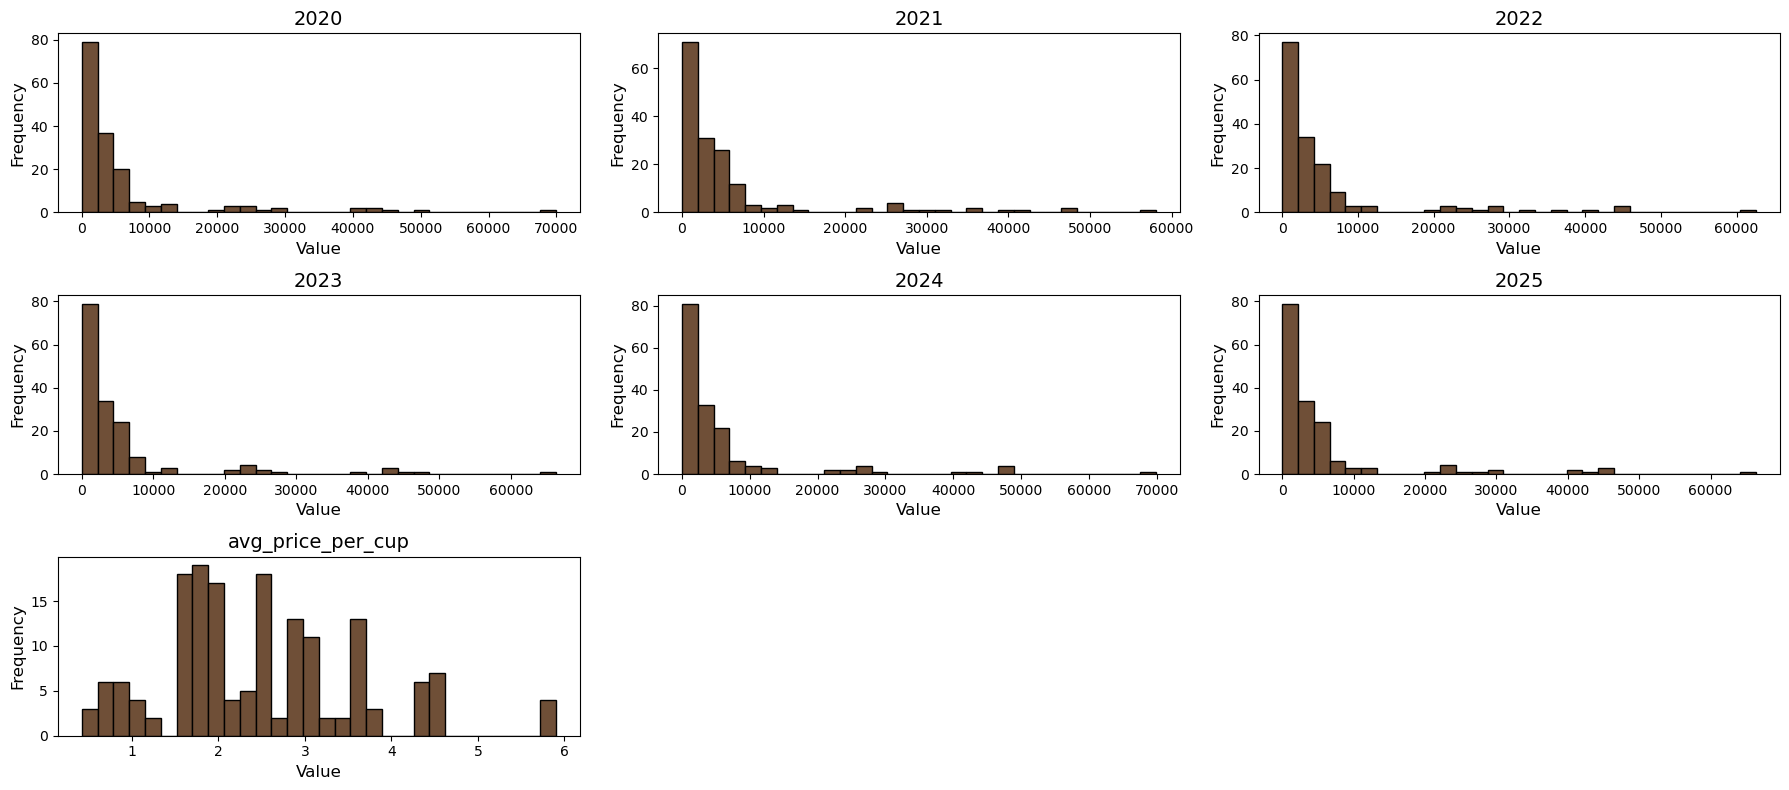

In [39]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 8))

axes = axes.flatten()

color = '#6F4F37'

for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False)
        continue
    ax.hist(numerical.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(numerical.columns[i], fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

The graphs above show how coffee-related values such as production are distributed over the years from 2020 to 2025. Most of the values are concentrated at the lower end, meaning that a majority of countries or regions have relatively small numbers compared to a few that have very high ones. This creates a pattern where a few outliers stand out with much larger values.

In the last graph, which represents the average price per cup of coffee, the distribution looks quite different. The values are spread out more evenly, showing a variety of price points. This suggests that coffee prices vary significantly across regions, unlike production or consumption, which seem to have a few dominant players.

Overall, this visualization highlights how coffee-related data is heavily skewed—most places have lower values, while a few have very high ones, influencing the overall trends.

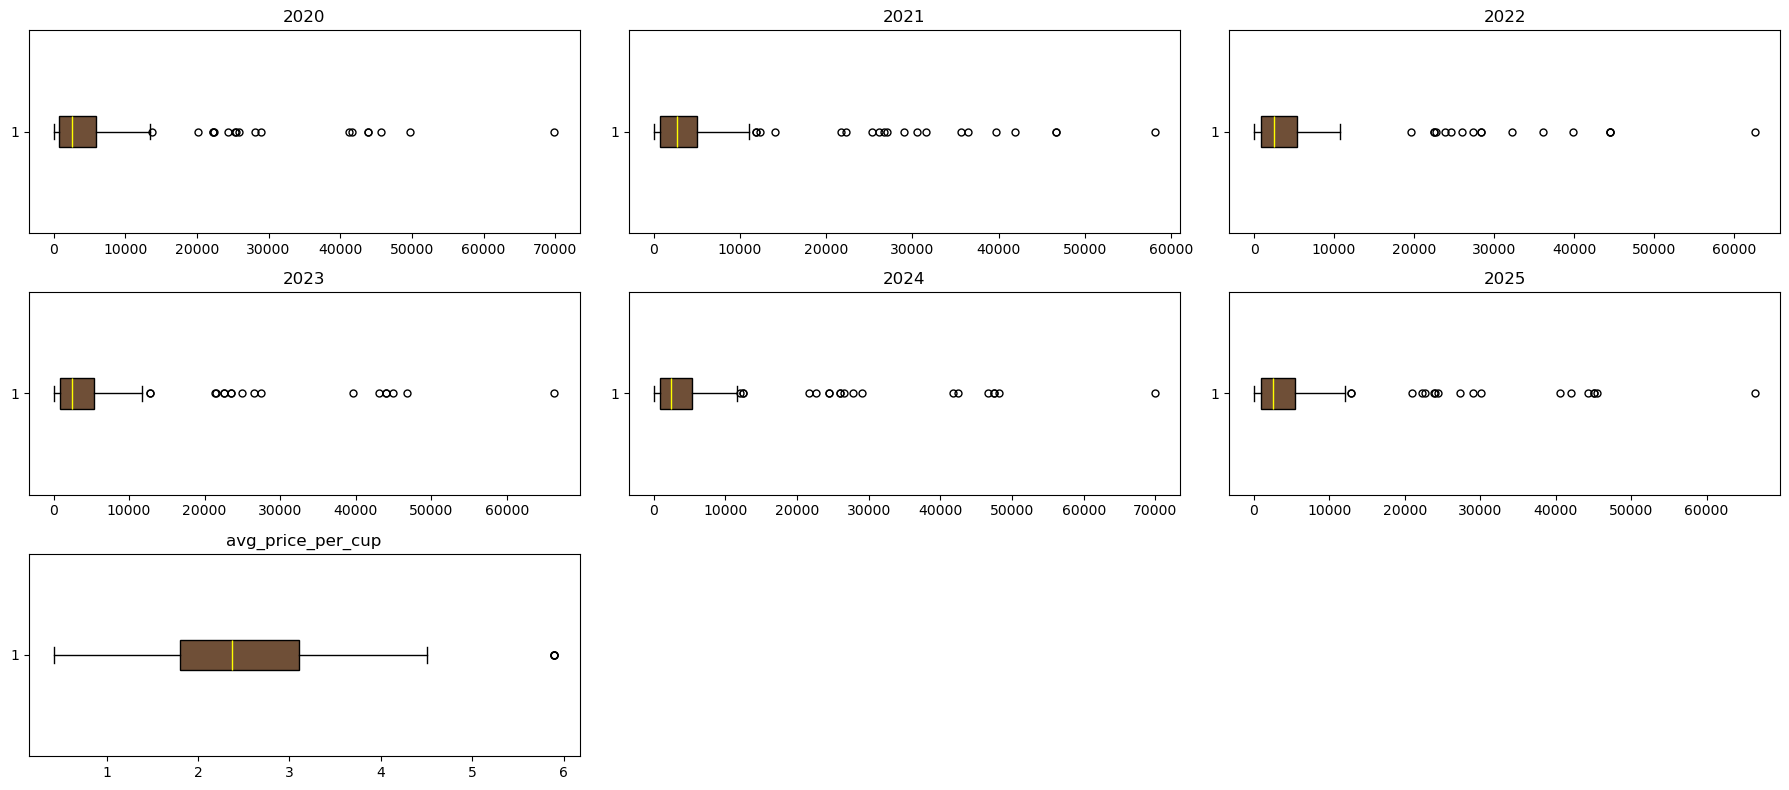

In [40]:
nrows, ncols = 3, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 8))

axes = axes.flatten()

color = '#6F4F37'

for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False) 
        continue
    ax.boxplot(numerical.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(numerical.columns[i], fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

These are boxplots showing the distribution of coffee-related data over the years 2020-2025, plus the average price per cup. Here's a quick breakdown of the insights:

By analysing the years 2020-2025 I am able to conclude that the distributions are heavily skewed, with a large number of data points concentrated at the lower end and a few extreme outliers reaching very high values, probably representing major coffee-producing countries.
The median remains relatively stable over the years, suggesting that the central trend of coffee production does not change drastically.
The presence of outliers remains consistent each year, which indicates that certain countries continue to dominate coffee-related metrics.

The price distribution appears more spread out compared to the other variables. There are fewer extreme outliers, but one country shows a significantly higher price per cup above 6 dollars.
The median price sits around 2 to 3 dollars, meaning that most countries have relatively affordable coffee.

<h1 style="color: #D2691E;"> 04| EDA (Exploratory Data Analysis)- comsumption data</h1>

In [41]:
df_consumption= pd.read_csv("df_consumption_finall.csv")
df_consumption

,country,continent,consumption_kg,yearly_coffee_consumption_pcapita_kg,daily_cofee_consumption_pcapita_cup,coffe_drinking_year,lifetime_cup_consumption_cup,price_per_cup,total_lifetime_coffee_spending
0,Luxembourg,Europe,13440000,20.53,5.31,61,118227,3.60,425.618
1,Finland,Europe,80880000,14.58,3.77,61,83939,4.00,335.756
2,Sweden,Europe,106140000,10.00,2.59,62,58612,3.70,216.863
3,Norway,Europe,54360000,9.93,2.57,62,58159,4.40,255.900
4,Austria,Europe,70380000,7.86,2.03,61,45198,3.30,149.153
...,...,...,...,...,...,...,...,...,...
60,Egypt,Africa,74520000,0.66,0.17,49,3040,1.99,6.050
61,South Africa,Africa,39180000,0.65,0.17,41,2544,1.72,4.376
62,Peru,South America,15000000,0.44,0.11,55,2208,2.50,5.521
63,Uganda,Africa,15240000,0.31,0.08,42,1226,2.86,3.508


<h3 style="color: #D2691E;"> Exploring numerical and categorical variable</h3>

In [42]:
cat= df_consumption.select_dtypes(exclude="number")
num=df_consumption.select_dtypes(include="number")

<h4 style="color: #D2691E;"> Categorical variables </h4>

In [43]:
cat.head()

,country,continent
0,Luxembourg,Europe
1,Finland,Europe
2,Sweden,Europe
3,Norway,Europe
4,Austria,Europe


In [44]:
freq_table_country= cat.country.value_counts().reset_index()
freq_table_country.columns= ["country", "absolute_frequency"]

In [45]:
prop_table_country= cat.country.value_counts(normalize=True).reset_index()
prop_table_country.columns= ["country", "relative_frequency"]

In [46]:
country_consumption_table= pd.concat([freq_table_country, prop_table_country], axis=1)
country_consumption_table.columns= ["country", "absolute_frequency","country_2","relative_frequency"]
country_consumption_table.drop(columns="country_2", inplace=True)
country_consumption_table

,country,absolute_frequency,relative_frequency
0,Luxembourg,1,0.015385
1,Romania,1,0.015385
2,Algeria,1,0.015385
3,El Salvador,1,0.015385
4,Hungary,1,0.015385
...,...,...,...
60,Costa Rica,1,0.015385
61,Japan,1,0.015385
62,Poland,1,0.015385
63,Latvia,1,0.015385


The dataset shows that coffee consumption is spread fairly evenly across a large number of countries, with each country listed having an absolute frequency of 1. This indicates that each country appears once in the data, contributing equally to the overall distribution.

The countries in the dataset range from small nations like Luxembourg, Romania, Algeria, to larger countries like India and Japan, suggesting that coffee consumption is a global phenomenon, encompassing both developing and developed countries.

The dataset includes countries from various continents, including Europe with countries like Poland, Latvia, Africa with Algeria, Asia with Japan and  India, and Latin America with Brazil, El Salvador and Costa Rica. 

Countries like Costa Rica and El Salvador, known for their coffee production, are also part of the consumption dataset, underlining the relationship between coffee production and domestic consumption.

I can conclude that the coffee consumption is widely spread across countries, and while some countries especially European and Asian nations dominate in terms of global consumption, there is an interesting balance between producers and consumers, with countries like India and Japan showing a growing coffee culture.

In [47]:
freq_table_continent= cat.continent.value_counts().reset_index()
freq_table_continent.columns= ["continent", "absolute_frequency"]

In [48]:
prop_table_continent= cat.continent.value_counts(normalize=True).reset_index()
prop_table_continent.columns= ["continent", "relative_frequency"]

In [49]:
continent_consumption_table= pd.concat([freq_table_continent, prop_table_continent], axis=1)
continent_consumption_table.columns= ["continent", "absolute_frequency","continent_2","relative_frequency"]
continent_consumption_table.drop(columns="continent_2", inplace=True)
continent_consumption_table

,continent,absolute_frequency,relative_frequency
0,Europe,31,0.476923
1,Asia,11,0.169231
2,North America,9,0.138462
3,Africa,8,0.123077
4,South America,5,0.076923
5,Oceania,1,0.015385


Europe dominates coffee consumption with 31 occurrences, representing 47.7% of the total dataset. This indicates that European countries are the most frequent consumers of coffee, aligning with known coffee culture trends in nations like Finland, Sweden, and Italy.

Asia comes second with 11 occurrences, reflecting the growing coffee consumption in countries like Japan, South Korea, and India, where coffee culture is rapidly expanding despite traditional tea consumption.

North America accounts for 9 occurrences, showing a significant coffee consumption presence, especially in the United States and Canada, known for their high per capita coffee consumption.

With 8 occurrences, Africa demonstrates an emerging trend of increased coffee consumption, especially in coffee-growing countries like Ethiopia and Kenya, where the connection to coffee production may influence local consumption rates.

South America contributes 5 occurrences, despite being a major coffee-producing region, suggesting a difference between coffee production and domestic consumption. Oceania has the smallest share, with only 1 occurrence , likely due to the limited data or smaller consumption rates in countries like Australia and New Zealand.

So I can conclude that Europe is by far the largest consumer of coffee, with other continents like Asia and North America showing a strong presence as well. Africa is gaining traction in consumption, while South America and Oceania have relatively lower representation, potentially due to a focus on production rather than local consumption.

In [50]:
country_avg_price_consumption = df_consumption.groupby('country')['price_per_cup'].mean().sort_values(ascending=False).head(10)

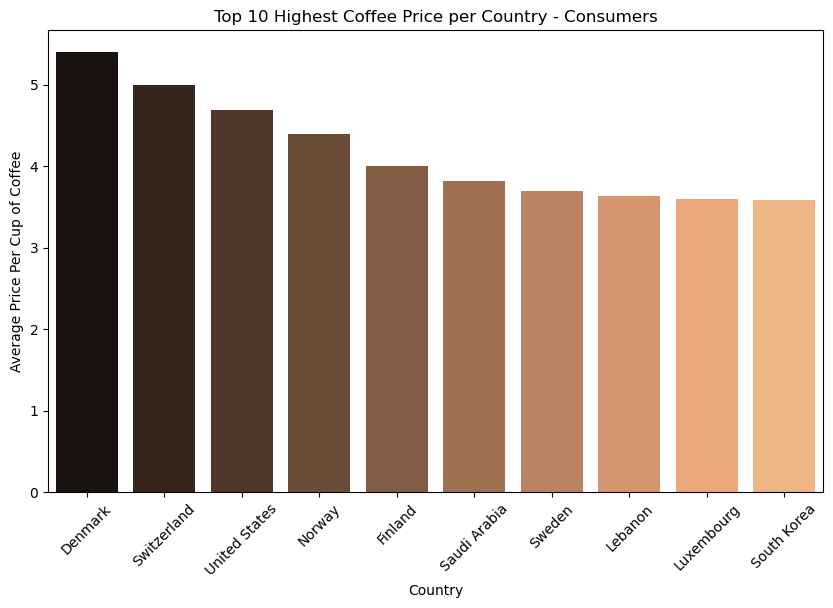

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_avg_price_consumption.index, y=country_avg_price_consumption.values,palette='copper')

plt.title('Top 10 Highest Coffee Price per Country - Consumers')
plt.xlabel('Country')
plt.ylabel('Average Price Per Cup of Coffee')
plt.xticks(rotation=45)

plt.show()

The bar chart showcases the highest average prices for a cup of coffee worldwide:

Denmark has the highest coffee price, exceeding 5 dollars per cup.
Switzerland and the United States follow closely, both above 4.50 dollars per cup.

European dominance: The majority of expensive coffee markets are in Europe (Denmark, Switzerland, Norway, Finland, Sweden, Luxembourg).
Economic and lifestyle impact: High coffee prices in countries like Denmark and Switzerland could be linked to high living costs, taxation, or premium coffee culture.

Middle Eastern and Asian presence: Saudi Arabia and South Korea also make the top 10, indicating strong coffee consumption despite traditionally being tea-drinking regions.

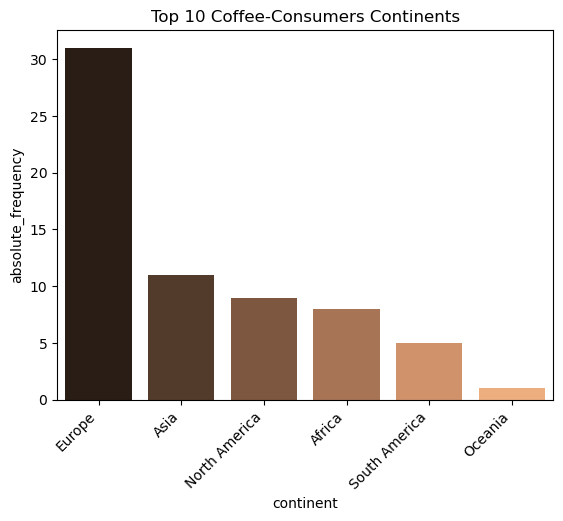

In [52]:
sns.barplot(x="continent", y="absolute_frequency", data= continent_consumption_table, palette= "copper")
plt.title("Top 10 Coffee-Consumers Continents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Axes: ylabel='absolute_frequency'>

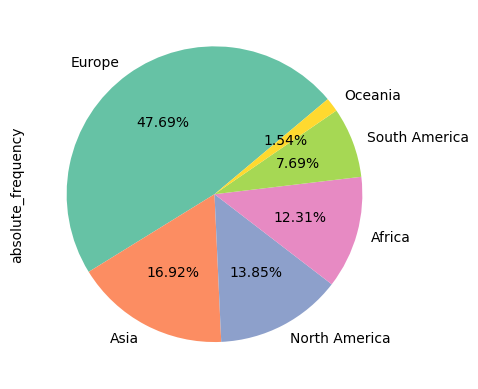

In [53]:
continent_consumption_table["absolute_frequency"].plot.pie(autopct='%1.2f%%', startangle=40, colors=sns.color_palette('Set2'), labels=continent_consumption_table['continent'])

Europe has the highest coffee consumption, which aligns with global trends—European countries, especially in Scandinavia and Western Europe, have some of the highest per capita coffee consumption rates.

Asia, North America, and Africa follow with moderate consumption levels. This suggests growing coffee markets in these regions, especially in urban centers.

South America’s lower representation is interesting because it's a major producer. This could indicate that a significant portion of the coffee grown there is exported rather than consumed domestically.
Oceania has minimal coffee consumption, which is expected due to its smaller population size compared to other continents.

<h4 style="color: #D2691E;"> Numerical variables </h4>

In [54]:
pd.set_option('display.float_format', '{:,.2f}'.format) 

I did the code above to ensure that my data keeps formatted with 2 decimals as i wish

In [55]:
num.describe()

,consumption_kg,yearly_coffee_consumption_pcapita_kg,daily_cofee_consumption_pcapita_cup,coffe_drinking_year,lifetime_cup_consumption_cup,price_per_cup,total_lifetime_coffee_spending
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00
mean,"138,402,461.54",4.04,1.05,55.54,"22,253.11",2.55,77.77
std,"261,493,189.36",3.45,0.89,5.72,"20,187.02",0.99,110.22
min,"1,380,000.00",0.06,0.02,41.00,365.00,0.78,3.51
25%,"22,620,000.00",1.77,0.46,52.00,"7,848.00",1.76,14.31
50%,"66,480,000.00",3.34,0.86,56.00,"16,746.00",2.48,46.06
75%,"126,600,000.00",5.70,1.47,61.00,"31,142.00",3.10,98.58
max,"1,599,060,000.00",20.53,5.31,63.00,"118,227.00",5.40,668.00


The average annual coffee consumption is approximately 138.4 million kg across all countries, with a standard deviation of 261.5 million kg, suggesting significant variation in the total consumption across countries.

The range of coffee consumption varies from 1.38 million kg to 1.6 billion kg, reflecting both smaller coffee-consuming nations and the largest coffee consumers like the United States and Brazil.

Regarding the Yearly Coffee Consumption per Capita (kg), on average, individuals consume 4.04 kg of coffee annually. This figure, with a standard deviation of 3.45 kg, suggests that some countries are consuming far more coffee than others. The range values from 0.06 kg to 20.53 kg, indicating significant differences in per capita consumption globally.

Daily Coffee Consumption per Capita (cups), on average, shows that individuals drink 1.05 cups of coffee daily, with the lowest at 0.02 cups and the highest at 5.31 cups, further highlighting the varying consumption habits from one region to another.

Coffee Drinking Years: The average number of years people have been drinking coffee is 55.54 years, with most people likely starting in early adulthood. This consistent consumption period is seen across many countries.

The lifetime consumption in cups is substantial, with an average of 22,253 cups, ranging from 365 cups concerning the minimum value to a maximum of 118,227 cups.

The average price per cup of coffee is 2.55 dollars, though it can go as high as 5.40 dollars per cup, with a standard deviation of $0.99. This suggests that coffee prices are relatively affordable in most countries, but there are countries where coffee prices are notably higher, probably due to taxes on imports and purchase power of that country.

The average lifetime expenditure on coffee is about 77.77 dollars, with a large range from 3.51 dollars to 668.00 dollars. This significant spread indicates that people in some countries spend far more on coffee over their lifetime than others, reflecting both the price of coffee and the frequency of consumption.

Summarizing this analysis I can conclude that there's a high degree of variability in coffee consumption, with certain countries consuming significantly more coffee per capita than others. The data reflects different global coffee cultures, with Europe and North America generally leading in per capita consumption.
The amount spent on coffee over a lifetime varies greatly. Countries with higher coffee prices, or higher consumption, show significantly greater lifetime spending, potentially influencing local economies.

<h4 style="color: #D2691E;"> Shape of distribution - Skewness </h4>

In [56]:
num["consumption_kg"].skew().round(2)

4.35

In [57]:
num["yearly_coffee_consumption_pcapita_kg"].skew().round(2)

2.24

In [58]:
num["daily_cofee_consumption_pcapita_cup"].skew().round(2)

2.25

In [59]:
num["coffe_drinking_year"].skew().round(2)

-0.78

In [60]:
num["lifetime_cup_consumption_cup"].skew().round(2)

2.25

In [61]:
num["price_per_cup"].skew().round(2)

0.63

In [62]:
num["total_lifetime_coffee_spending"].skew().round(2)

3.29

High Right-Skewed:

Consumption per kg (4.35) – Most people consume lower amounts of coffee, but some outliers drink a lot.
Yearly coffee consumption per capita in kg (2.24) – Similar pattern: a few heavy consumers increase the average.
Daily coffee consumption per capita in cups (2.25) – Most drink 1-2 cups, but some drink a lot more.
Lifetime cup consumption (2.25) – Over a lifetime, most people drink a moderate amount, but some individuals have extremely high lifetime consumption.
Total lifetime coffee spending (3.29) – Most people don’t spend too much on coffee, but a few outliers have very high lifetime spending.


Slight Positive Skewness:

Price per cup (0.63) – Coffee is relatively affordable for most, but there are some high-priced options like premium brands.


Left-Skewed:

Coffee drinking year (-0.78) – Most people started drinking coffee at a similar, later age, but a few outliers started very young, bringing the average down.

<h4 style="color: #D2691E;"> Shape of distribution - Kurtosis </h4>

In [63]:
num["consumption_kg"].kurtosis().round(2)

20.86

In [64]:
num["yearly_coffee_consumption_pcapita_kg"].kurtosis().round(2)

7.91

In [65]:
num["daily_cofee_consumption_pcapita_cup"].kurtosis().round(2)

7.92

In [66]:
num["coffe_drinking_year"].kurtosis().round(2)

-0.1

In [67]:
num["lifetime_cup_consumption_cup"].kurtosis().round(2)

7.78

In [68]:
num["price_per_cup"].kurtosis().round(2)

0.29

In [69]:
num["total_lifetime_coffee_spending"].kurtosis().round(2)

13.53

Consumption in kg (20.86): Very high kurtosis, indicating a significant presence of extreme values.
Some individuals may consume an exceptionally high amount of coffee compared to the average.

Yearly Coffee Consumption Per Capita (kg) (7.91):High kurtosis suggests a distribution with some extreme values.
Some people consume much more coffee than the majority.

Daily Coffee Consumption Per Capita (cups) (7.92):Similar to yearly consumption, meaning coffee intake varies significantly among individuals.
A few individuals consume a much higher number of cups per day.

Years of Coffee Drinking (-0.1):Kurtosis near zero suggests a flat distribution.
No extreme outliers; coffee drinking habits over a lifetime are more evenly spread.

Lifetime Cup Consumption (7.78):High kurtosis indicates extreme values.
Some individuals have consumed far more coffee over their lifetime than others.

Price Per Cup (0.29):Low kurtosis suggests a fairly uniform distribution of coffee prices.
Price variations are not extreme.

Total Lifetime Coffee Spending (13.53): High kurtosis indicates some people have spent a significantly higher amount on coffee compared to the average.
Likely due to high consumption or purchasing expensive coffee.

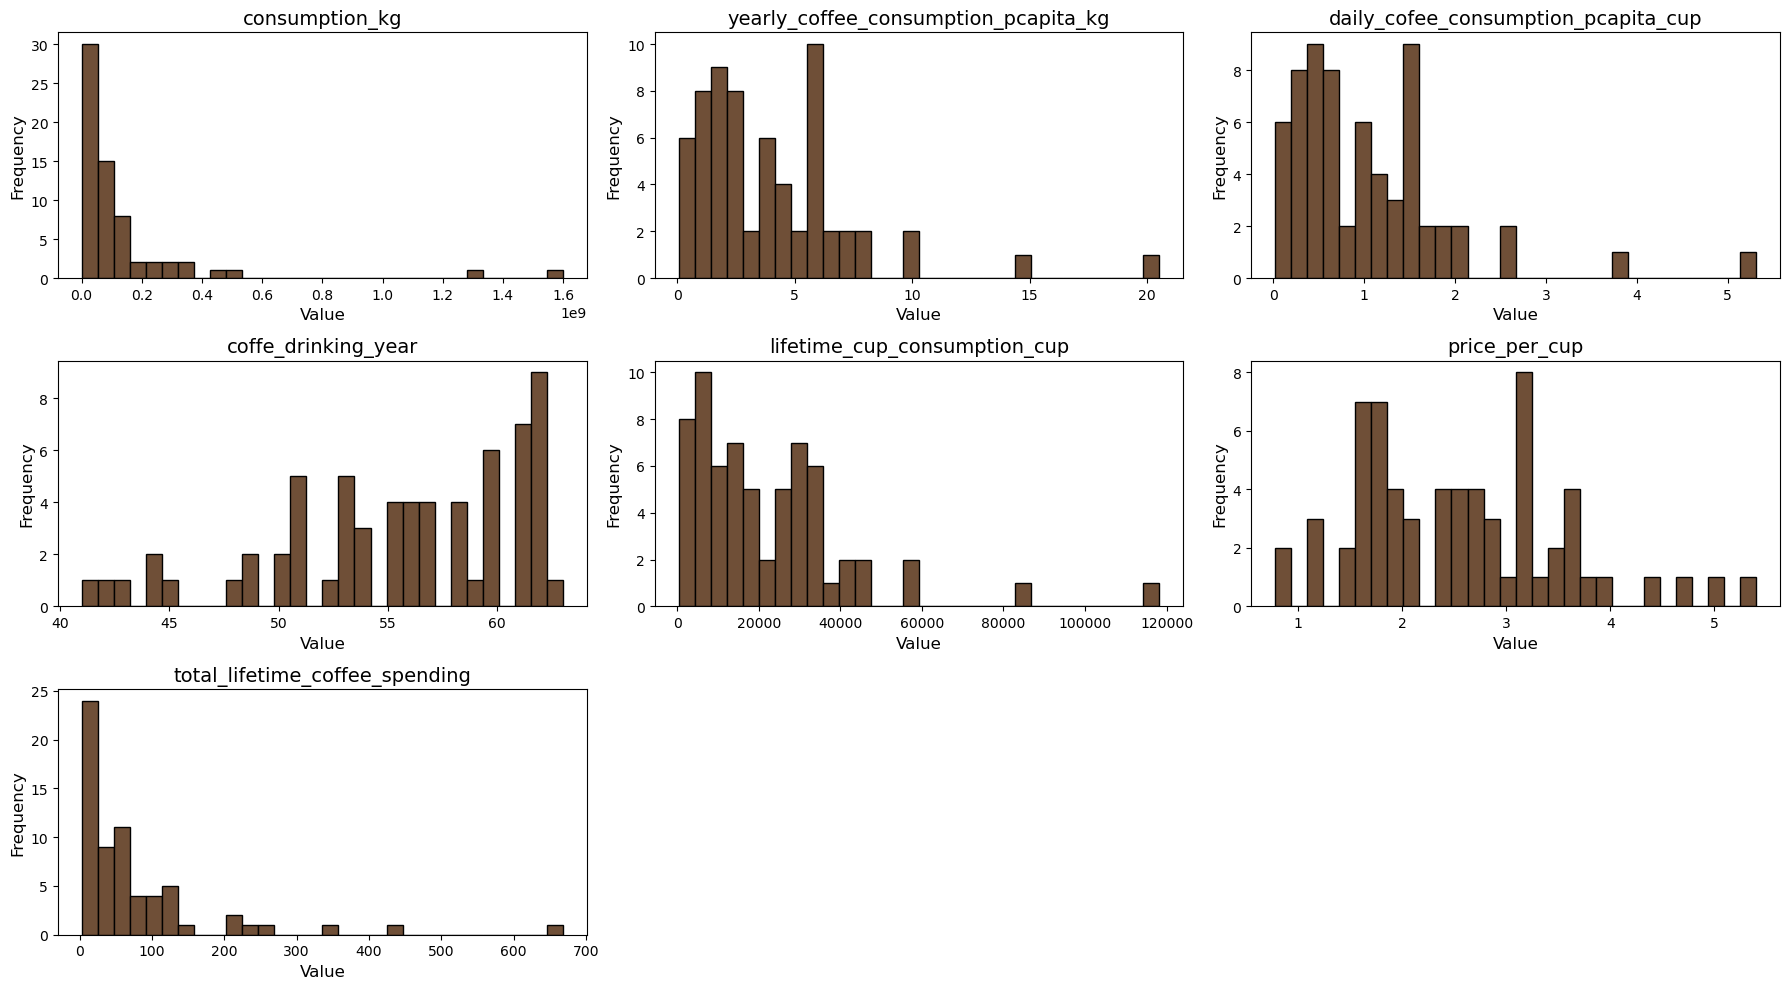

In [70]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

axes = axes.flatten()

color = '#6F4F37'

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i], fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

The distribution of consumption per kg is highly right-skewed, with most values concentrated at the lower end.
A few extreme values suggest outliers, possibly from high-consumption countries.

The data for Yearly Coffee Consumption Per Capita (kg) is also skewed to the right, meaning most individuals consume small amounts of coffee.
A few countries report significantly higher yearly consumption.

The distribution of Daily Coffee Consumption Per Capita (cups) is somewhat normal, but with a slight right skew.
Most values cluster around 1–2 cups per day, which aligns with average daily coffee intake.
Some extreme values suggest heavy coffee drinkers.

The distribution of Coffee Drinking Age (Years) is more spread out, covering ages from 40 to 60.
The data appears bimodal, suggesting two peaks, possibly indicating different age groups with distinct coffee consumption habits.

Lifetime Cup Consumption (Cups) is alsi right-skewed, meaning most people have a lower lifetime cup consumption, but a few have exceptionally high values. Possible outliers where individuals have consumed a significantly higher number of cups.

The distribution for Price Per Cup is more uniform, but with some peaks around €2-3.Some values at the higher end suggest outliers, possibly luxury coffee brands or expensive countries.

Lastly the distribution of Total Lifetime Coffee Spending is right-skewed, showing that most people spend lower amounts, but some individuals have extremely high lifetime expenditures on coffee.

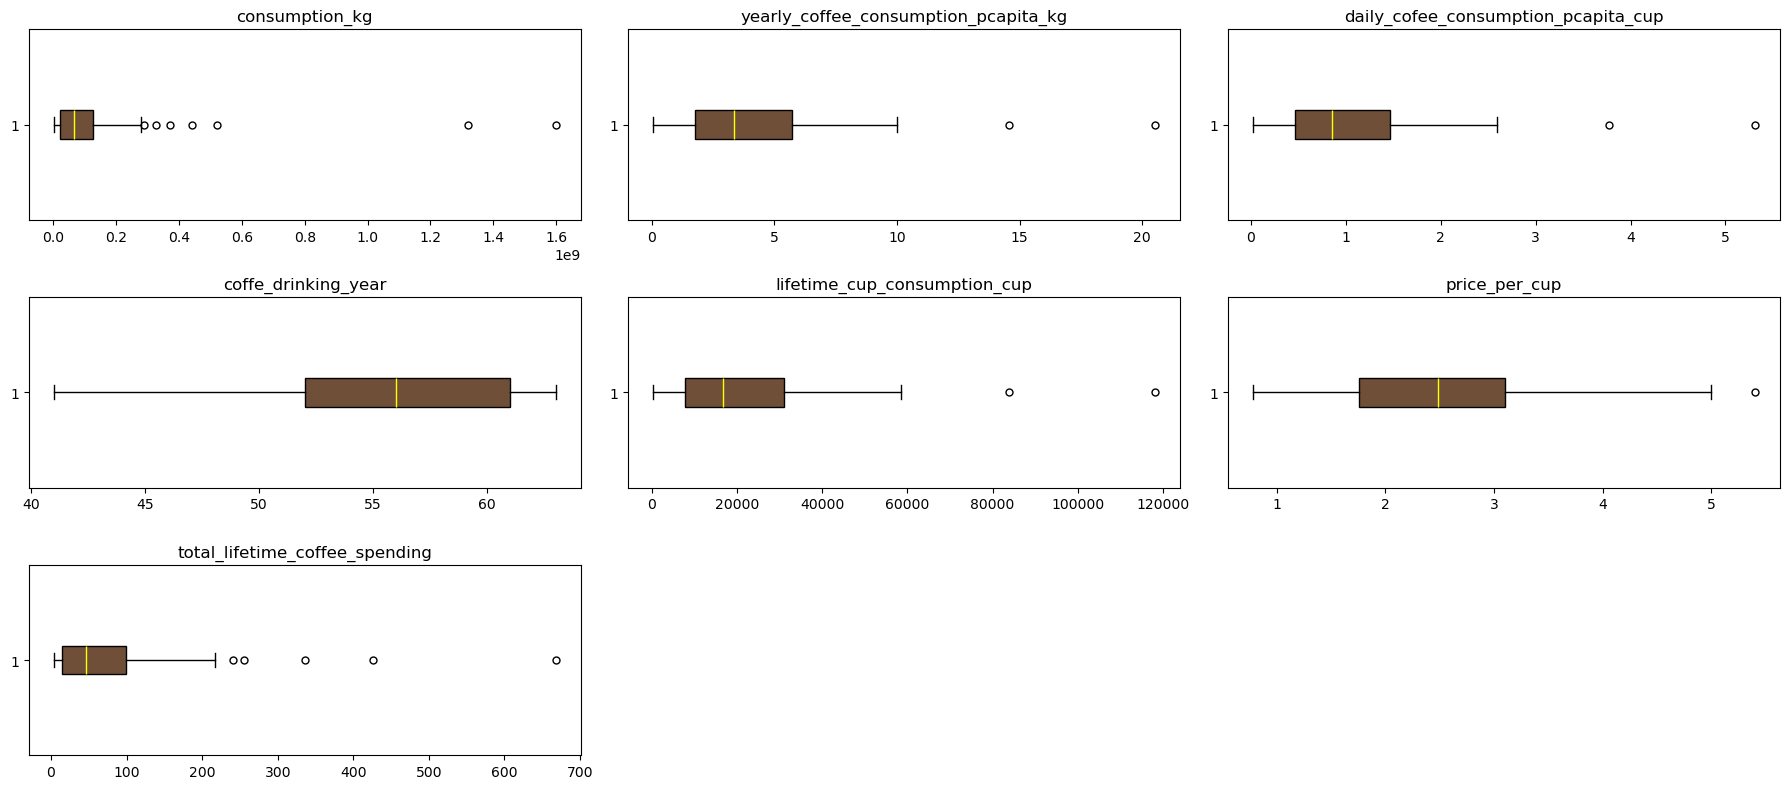

In [71]:
nrows, ncols = 3, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 8))

axes = axes.flatten()

color = '#6F4F37'

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False) 
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

Consumption (kg), the presence of many outliers suggests that some countries consume much more coffee than others.

Yearly Coffee Consumption Per Capita (kg), outliers are present at the high end, indicating that some individuals consume significantly more than average. The median is closer to the lower quartile, showing that most values are on the lower end.

Daily Coffee Consumption Per Capita (cups), the boxplot shows a relatively normal distribution, with a few high-end outliers.
The majority of coffee consumers drink between 1 and 2 cups per day.

Coffee Drinking Age (Years), the box is more evenly spread, suggesting that drinking coffee is common across different ages.
Few outliers indicate individuals who started drinking coffee very early or late in life.

Lifetime Cup Consumption (Cups), the outliers suggest that some individuals have consumed significantly more coffee than the general population.
The median is skewed towards the lower quartile, meaning most individuals have moderate lifetime coffee consumption.

Price Per Cup, the price distribution is relatively even, with some expensive coffee prices appearing as outliers.

Total Lifetime Coffee Spending, the high number of outliers suggests that some people have spent a substantially higher amount on coffee than the average. The median is closer to the lower quartile, indicating that most people have modest lifetime coffee expenses.

<h3 style="color: #D2691E;"> Bivariate analysis - The Global Coffee Price Puzzle- Does Consumption Influence the Prices </h3>

<h4 style="color: #D2691E;"> Looking for Correlations </h4>

In [72]:
correlation = df_consumption["consumption_kg"].corr(df_consumption["price_per_cup"])
correlation

0.12779665494360823

In this analysis, I explored the correlation between coffee consumption (in kilograms) and the price per cup to understand potential market dynamics. The correlation value of 0.1278 indicates a weak positive relationship between coffee consumption in kilograms and the price per cup of coffee. This suggests that as coffee consumption increases, the price per cup might increase slightly, but the relationship is not very strong.

It aligns with the idea that higher demand could influence prices, but other factors such as regional price variations, local market conditions, or consumer preferences may be at play.

In [73]:
correlation = df_consumption["consumption_kg"].corr(df_consumption["price_per_cup"], method ="spearman")
correlation

-0.012702370125472795

The Spearman correlation value of -0.0127 suggests a very weak negative relationship between coffee consumption in kilograms and the price per cup of coffee. Since -0.0127 is very close to 0, it indicates almost no monotonic relationship between coffee consumption and price per cup.

This very weak negative correlation means that there is essentially no significant relationship between coffee consumption and the price per cup.
In other words, changes in coffee consumption do not seem to consistently relate to increases or decreases in the price of coffee

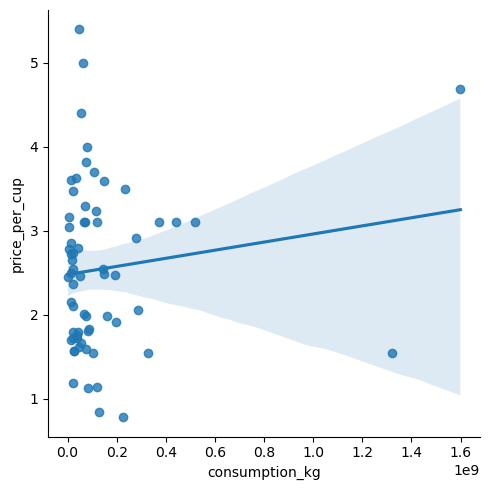

In [74]:
sns.lmplot(data=df_consumption,
            x='consumption_kg',
            y='price_per_cup')
plt.show()

Conclusion of both correlations:

The Pearson correlation of 0.13 suggests a very weak positive linear relationship between coffee consumption and price per cup, indicating that in some instances, higher coffee consumption may be slightly associated with higher prices. However, the Spearman correlation of -0.01 reveals that there is essentially no monotonic relationship between the two variables. This discrepancy suggests that while there might be isolated cases where both variables increase together, overall, there isn't a strong or consistent pattern. Other factors, such as regional price variations, local market conditions, or supply chain influences, are likely affecting the price of coffee more than the volume of consumption. Further analysis, including segmentation by country, income levels, or production costs, could provide additional insights into the underlying dynamics.

<h1 style="color: #D2691E;"> 05| Hypothesis Testing </h1>

In [75]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [76]:
alpha= 0.05

H₀ (Null Hypothesis): The average price per cup of coffee in producing countries is greater than or equal to the price in non-producing countries.

H₁ (Alternative Hypothesis): The average price per cup of coffee in producing countries is less than in non-producing countries.

<h4 style="color: #D2691E;"> One Tailed Test </h4>

The one tailed t-test is used in this case because I want to see specifically one direction, in this case i want to see if the prices are lower in producing countries than in non-producing countries

In [77]:
producing_prices = df_production['avg_price_per_cup']
non_producing_prices = df_consumption['price_per_cup']

In [78]:
t_stat, p_value = st.ttest_ind(producing_prices, non_producing_prices, equal_var=False, alternative="less")
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.34f}")
print()
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Not enough evidence to say that coffee is cheaper in producing countries.")
else:
    print("Reject the Null Hypothesis: There is evidence that coffee is cheaper in producing countries.")

Test Statistic (t): -0.39
P-Value: 0.3485170137462021422436464490601793

Fail to Reject the Null Hypothesis: Not enough evidence to say that coffee is cheaper in producing countries.


#### Conclusion I draw from Hypothesis Testing:

Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H₀). This suggests that there isn't enough evidence to claim that coffee is cheaper in producing countries compared to non-producing countries.

The negative t-statistic (-0.39) indicates that coffee prices might be slightly lower in producing countries, but this difference is minimal. The p-value of 0.3485 suggests a high probability that this observed result could have occurred by chance rather than being a true effect of the coffee production status on prices. Given that p > 0.05, it reinforces the conclusion that there is no significant difference between the two groups.

Why this happens?

Many coffee-producing countries, especially those with high-quality beans  like Brazil and Colombia, export a significant portion of their coffee. The demand for export-quality beans could increase the price domestically, leaving the average price per cup in these countries similar to or even higher than that in non-producing countries.

Also non-producing countries might have higher import taxes and costs, but many also have more efficient supply chains, subsidies, or stronger economies that help stabilize or lower prices. Countries that are strong importers of coffee may benefit from larger economies of scale, keeping the price stable or competitive.

Even in coffee-producing countries, local factors such as transportation costs and varying levels of local demand can push prices higher. This is particularly true in more remote or less-developed regions where supply chains are less efficient.

Lastly some non-producing countries like Luxembourg and Finland have a mixture of budget and premium coffee options. This can balance out the average price per cup, resulting in similar or even lower prices compared to producing countries. These countries may also have a wealthier population willing to pay a premium for specialty coffee, affecting the overall price distribution.

<h1 style="color: #D2691E;"> 06| Sentiment Analysis </h1>

In [79]:
import nltk

In [80]:
data = pd.read_csv("coffee_form.csv")
data.drop(columns="Carimbo de data/hora", inplace= True)
data.columns=["coffee_price_feedback", "coffee_quality_feedback", "price_influenced_by_production", "coffee_preference", "additional_thoughts", "overall_score"]
data.dropna(inplace= True)
data.drop(columns= ["price_influenced_by_production", "coffee_preference", "additional_thoughts"], inplace= True)
data

,coffee_price_feedback,coffee_quality_feedback,overall_score
0,It's affordable and great value,coffee is a bit expensive in the Netherlands a...,2.00
1,I dont like that is so expensive,I like a little bit of a strong coffee flavour...,4.00
2,"I wish it was cheaper, but I still buy it",The Netherlands has a good quality of coffee. ...,3.00
3,I dont like that is too expensive for my wallet,It is ok,2.00
4,"I think it should be cheaper, but I still buy it",Coffee quality is okay but lacks some flavour,2.00
5,It's affordable and great value,"Quality is great, usually I buy the Colombian ...",4.00
6,i am not happy with the price if the quality i...,Coffee is very watery from what I was used to,1.00
7,The price is just right,For me coffee is coffee I do not care much abo...,4.00
8,"I think it should be cheaper, but I still buy it",Coffee is great and I love its taste!,3.00
9,It's too expensive for what I get,Where I live coffee has become more and more e...,4.00


These reviews regarding the coffe pricing i got from a questionaire i created and made public. I had some people answering and giving their insights of the prices in their countries. Given this, I will proceed with the sentiment analysis.

In [81]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Inês
[nltk_data]     Bettencourt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
from nltk.sentiment import SentimentIntensityAnalyzer
vd = SentimentIntensityAnalyzer()

<h2 style="color: #D2691E;"> Coffee Price Feedback Analysis </h2>

In [83]:
coffee_price_feedback= data["coffee_price_feedback"]
coffee_price_feedback

0                      It's affordable and great value
1                     I dont like that is so expensive
2            I wish it was cheaper, but I still buy it
3      I dont like that is too expensive for my wallet
4     I think it should be cheaper, but I still buy it
5                      It's affordable and great value
6    i am not happy with the price if the quality i...
7                              The price is just right
8     I think it should be cheaper, but I still buy it
9                    It's too expensive for what I get
Name: coffee_price_feedback, dtype: object

In [84]:
text_scores = {}
vader_df_price = pd.DataFrame()

for _, row in data.iterrows():
    text = row["coffee_price_feedback"]
    polarity = vd.polarity_scores(text)
    vd_df = pd.DataFrame([polarity])
    vader_df_price = pd.concat([vader_df_price, vd_df], ignore_index=True)

In [85]:
vader_df_price

,neg,neu,pos,compound
0,0.00,0.32,0.68,0.76
1,0.30,0.70,0.00,-0.28
2,0.00,0.79,0.21,0.21
3,0.21,0.79,0.00,-0.28
4,0.00,1.00,0.00,0.00
5,0.00,0.32,0.68,0.76
6,0.40,0.60,0.00,-0.73
7,0.00,1.00,0.00,0.00
8,0.00,1.00,0.00,0.00
9,0.00,1.00,0.00,0.00


Sentiment Analysis on Coffee Price & Quality Feedback
As part of this analysis on coffee pricing and quality perception, I conducted a sentiment analysis using VADER on survey responses. The findings highlight key consumer opinions regarding affordability, taste, and price influence.

Insights I draw:

Pricing Perception: Responses were split—while some found coffee to be affordable and good value, others expressed dissatisfaction with high prices, particularly in the Netherlands.

Quality Feedback: Opinions on quality were mixed. Some respondents praised the taste (especially Colombian coffee), while others found it watery or lacking flavor.

Price vs. Production Influence: Most responses were neutral, indicating that consumers do not strongly associate local production with pricing differences.

Overall Sentiment Breakdown:
30% Positive → Satisfaction with price and quality.
30% Negative → Complaints about high costs or weak taste.
40% Neutral → Fact-based responses with no strong emotion.

In [86]:
from wordcloud import WordCloud

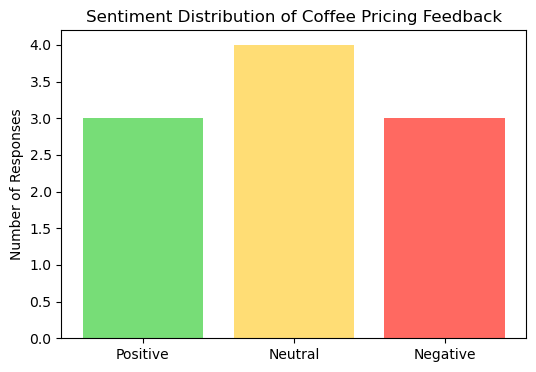

In [87]:
sentiment_counts = {
    "Positive": (vader_df_price["compound"] > 0).sum(),
    "Neutral": (vader_df_price["compound"] == 0).sum(),
    "Negative": (vader_df_price["compound"] < 0).sum(),
}

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=["#77DD77", "#FFDD75", "#FF6961"])
plt.title("Sentiment Distribution of Coffee Pricing Feedback")
plt.ylabel("Number of Responses")
plt.show()


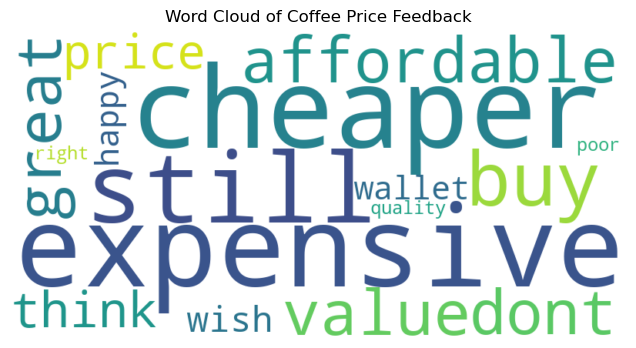

In [88]:
text = " ".join(data["coffee_price_feedback"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Coffee Price Feedback")
plt.show()


The word cloud visually represents customer opinions about coffee prices. Here are the key insights:

Dominant Concerns:

"Expensive" is the largest word, meaning many respondents find coffee costly.
"Cheaper" also appears prominently, indicating a desire for more affordable options.
"Buy" suggests purchasing decisions are influenced by price.

Mixed Perceptions:

Some users mention "affordable" and "value", implying that while some find coffee expensive, others think it offers good value.
"Great" and "happy" suggest positive sentiments from a portion of customers.

Negative Indicators:

"Dont" and "poor" might suggest dissatisfaction, possibly due to pricing or perceived quality concerns.
"Wallet" implies people are conscious of how coffee prices impact their budget.

<h2 style="color: #D2691E;"> Coffee Quality Feedback Analysis </h2>

In [89]:
text_scores_quality = {}
vader_df_quality = pd.DataFrame()

for _, row in data.iterrows():
    text = row["coffee_quality_feedback"]
    polarity = vd.polarity_scores(text)
    vd_df = pd.DataFrame([polarity])
    vader_df_quality= pd.concat([vader_df_quality, vd_df], ignore_index=True)

In [95]:
coffee_price_feedback= data["coffee_quality_feedback"].unique()
coffee_price_feedback

array(['coffee is a bit expensive in the Netherlands and it is not very good quality, that makes me sad',
       'I like a little bit of a strong coffee flavour when I drink my cappuchino',
       'The Netherlands has a good quality of coffee. To me the quality of the coffee sufficient. I guess it is the taste that I am used to. Coffee in the Netherlands is a bit expensive. But I also see it as a luxury product. ',
       'It is ok', 'Coffee quality is okay but lacks some flavour ',
       'Quality is great, usually I buy the Colombian beans',
       'Coffee is very watery from what I was used to',
       'For me coffee is coffee I do not care much about which beans are used',
       'Coffee is great and I love its taste!',
       'Where I live coffee has become more and more expensive but I do not mind because I love my coffee time'],
      dtype=object)

In [90]:
vader_df_quality

,neg,neu,pos,compound
0,0.26,0.74,0.00,-0.69
1,0.00,0.62,0.38,0.67
2,0.00,0.95,0.05,0.24
3,0.00,0.48,0.52,0.30
4,0.00,0.83,0.17,0.12
5,0.00,0.63,0.37,0.62
6,0.00,1.00,0.00,0.00
7,0.17,0.83,0.00,-0.39
8,0.00,0.37,0.63,0.86
9,0.21,0.79,0.00,-0.68


Top Positive Feedback:

Responses like row 1, which scored a high positive sentiment (0.67), reflect people who find the coffee quality acceptable, with no strong dislikes.
Row 8, with a positive compound score of 0.86, indicates a high level of satisfaction for some individuals with the coffee's flavor and experience.
Top Negative Feedback:

Responses with low compound scores (e.g., row 0 with -0.69 and row 9 with -0.68) show some dissatisfaction with the coffee quality. Words like "a bit weak" or "lack of flavor" may be present in these cases, suggesting that some consumers find the quality lacking or inconsistent.
Row 7, with a negative sentiment of -0.39, may suggest some dissatisfaction, though it’s still less intense than the other negative feedback.

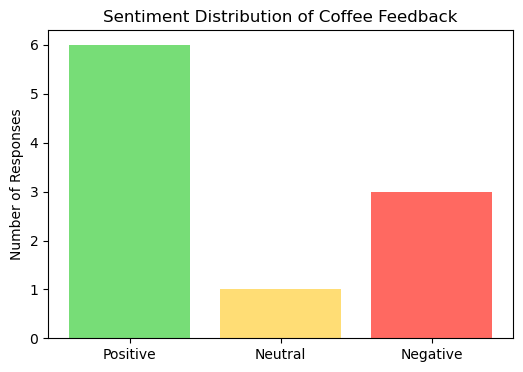

In [91]:
sentiment_counts_quality = {
    "Positive": (vader_df_quality["compound"] > 0).sum(),
    "Neutral": (vader_df_quality["compound"] == 0).sum(),
    "Negative": (vader_df_quality["compound"] < 0).sum(),
}

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts_quality.keys(), sentiment_counts_quality.values(), color=["#77DD77", "#FFDD75", "#FF6961"])
plt.title("Sentiment Distribution of Coffee Feedback")
plt.ylabel("Number of Responses")
plt.show()


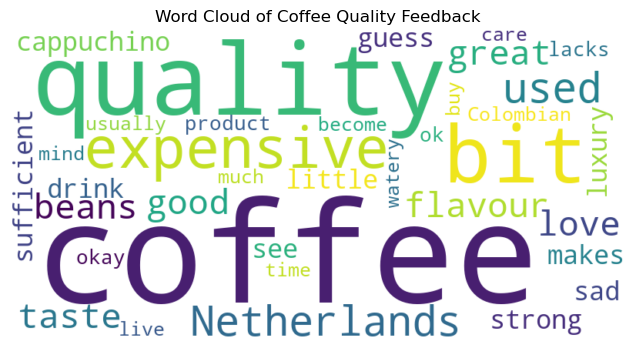

In [92]:
text = " ".join(data["coffee_quality_feedback"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Coffee Quality Feedback")
plt.show()

The most prominent word in the word cloud is "coffee", which is expected given the context.
Other large words include "quality," "expensive," "Netherlands," "flavour," "used," and "great."

Positive Sentiment: Words like "great," "love," "good," "strong," "luxury," and "flavour" suggest that some consumers appreciate the coffee quality.
Negative Sentiment: Words such as "expensive," "lacks," "sad," "bit," and "watery" indicate concerns regarding pricing and possible dissatisfaction with taste or quality.

The word "Netherlands" is quite prominent, suggesting that many reviews or feedback might be referring to coffee experiences in the Netherlands.

Words like "taste," "beans," "drink," and "cappuccino" highlight the focus on flavor, types of coffee, and how it is consumed.

Price Sensitivity: The strong presence of "expensive" suggests that coffee pricing is a concern for consumers, particularly in the Netherlands.
Quality vs. Cost Trade-off: The combination of "quality" and "expensive" could indicate that while the coffee is perceived as high quality, its price might be a drawback.
Consumer Preferences: People seem to focus on flavor, strength, and type of beans, which could be useful for businesses aiming to enhance their product offerings.

<h2 style="color: #D2691E;"> Overall Satisfaction </h2>

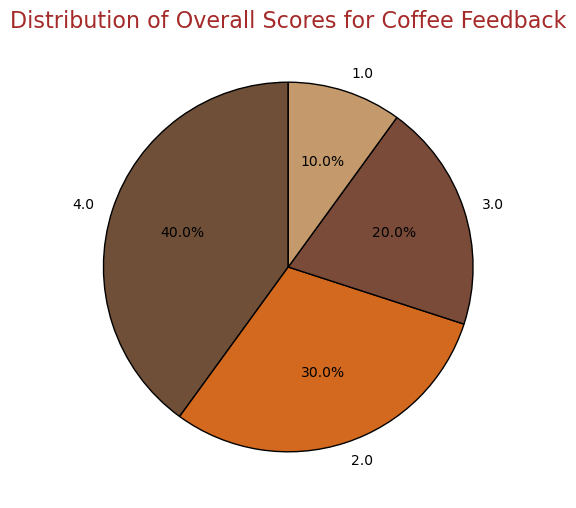

In [93]:
score_counts = data['overall_score'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=["#6F4F37", "#D2691E", "#7B4B3A", "#C49A6C", "#9E7B5A"], 
        wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Overall Scores for Coffee Feedback", fontsize=16, fontweight='light', color='brown')

plt.show()

This pie chart represents the distribution of scores given in a coffee feedback questionnaire. The key observations are:

No One Rated 5 Stars: This suggests that while people found the coffee acceptable or good, no one thought it was outstanding.
It could indicate areas for improvement in quality, taste, or overall experience.

Majority Gave a 4-Star Rating (40%): The most common rating is 4, meaning a large portion of respondents were satisfied but not completely impressed.
This is a strong positive indicator but also hints at small areas for enhancement.

Significant 2-Star Ratings (30%): A notable portion of respondents were not very satisfied, suggesting that certain aspects (e.g., taste, price, service) need attention.
Understanding what led to these lower ratings can help in refining the product or service.

20% Rated 3 Stars (Neutral): These respondents were neither highly satisfied nor dissatisfied.
This group might not have strong opinions but could be swayed with minor improvements.

10% Gave the Lowest Score (1 Star): A small segment of customers had a very poor experience.
Investigating specific complaints from this group is crucial to address potential issues.